In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve

import joblib

In [ ]:
# Load the dataset
df_og = pd.read_csv("/content/one_hot.csv")

In [ ]:
# Display the first few rows of the original data
print("Original DataFrame:")
df_og.head()

Original DataFrame:


,Name,# of Positions,Degree,Course,College,CGPA,HSC,SSC,Additional Info,# of tech skills,...,Public Relations,Public Speaking,Recruitment,Report Writing,Risk Management,Sales,Strategic Planning,Team Building,Time Management,Vendor Management
0,Vaishnavi Arolkar,5,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.77,NaN,NaN,"{'Key Values': {'cgpa': '8.77', 'skills': 'Tim...",13,...,0,0,0,0,0,0,0,0,1,0
1,Kundan Choudhary,0,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.20,NaN,NaN,"{'Key Values': {}, 'Languages': [], 'Certifica...",3,...,0,0,0,0,0,1,0,0,0,0
2,Vikram Choudhary,2,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.05,NaN,NaN,"{'Key Values': {'cgpa': '7.05'}, 'Languages': ...",11,...,0,0,0,0,0,0,0,0,0,0
3,Anushri Deshmukh,6,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.25,NaN,NaN,"{'Key Values': {'skills': 'Python, Java, HTML,...",11,...,0,0,0,0,0,0,0,0,1,0
4,Raj Gandhi,3,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.75,NaN,NaN,"{'Key Values': {'skills': 'OOPs,'}, 'Languages...",6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Impute missing CGPA values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_og['CGPA'] = imputer.fit_transform(df_og[['CGPA']])

In [ ]:
# Display the data after imputation
print("\nDataFrame after CGPA Imputation:")
df_og.head()


DataFrame after CGPA Imputation:


,Name,# of Positions,Degree,Course,College,CGPA,HSC,SSC,Additional Info,# of tech skills,...,Public Relations,Public Speaking,Recruitment,Report Writing,Risk Management,Sales,Strategic Planning,Team Building,Time Management,Vendor Management
0,Vaishnavi Arolkar,5,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.77,NaN,NaN,"{'Key Values': {'cgpa': '8.77', 'skills': 'Tim...",13,...,0,0,0,0,0,0,0,0,1,0
1,Kundan Choudhary,0,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.20,NaN,NaN,"{'Key Values': {}, 'Languages': [], 'Certifica...",3,...,0,0,0,0,0,1,0,0,0,0
2,Vikram Choudhary,2,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.05,NaN,NaN,"{'Key Values': {'cgpa': '7.05'}, 'Languages': ...",11,...,0,0,0,0,0,0,0,0,0,0
3,Anushri Deshmukh,6,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.25,NaN,NaN,"{'Key Values': {'skills': 'Python, Java, HTML,...",11,...,0,0,0,0,0,0,0,0,1,0
4,Raj Gandhi,3,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.75,NaN,NaN,"{'Key Values': {'skills': 'OOPs,'}, 'Languages...",6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Drop irrelevant columns
df_og = df_og.drop(['College', 'HSC', 'SSC', 'Additional Info'], axis=1)

In [ ]:
# One-hot encode specific categorical columns
columns_to_encode = ['Degree', 'Course']
df_og = pd.get_dummies(df_og, columns=columns_to_encode, drop_first=False)

In [ ]:
# Display the data after one-hot encoding
print("\nDataFrame after One-Hot Encoding:")
df_og.head()


DataFrame after One-Hot Encoding:


,Name,# of Positions,CGPA,# of tech skills,# of non tech skills,Role,Company,AI,AWS,Agile,...,Sales,Strategic Planning,Team Building,Time Management,Vendor Management,Degree_Bachelor of Technology,Course_Computer Engineering,Course_Computer Networks,Course_Computer Science and Engineering,Course_Electronics Engineering
0,Vaishnavi Arolkar,5,8.77,13,4,SDE,Citius Tech,0,0,0,...,0,0,0,1,0,True,False,False,False,True
1,Kundan Choudhary,0,7.20,3,1,SDE,Barclays,0,0,0,...,1,0,0,0,0,True,False,False,False,True
2,Vikram Choudhary,2,7.05,11,0,Analyst,KPMG,0,0,0,...,0,0,0,0,0,True,False,False,False,True
3,Anushri Deshmukh,6,8.25,11,4,Associate Consultant,Oracle,0,0,0,...,0,0,0,1,0,True,False,False,False,True
4,Raj Gandhi,3,7.75,6,2,SDE,BNP Paribas CIB,0,0,0,...,0,0,0,0,0,True,False,False,False,True


In [ ]:
# Keep the 'Name' column for final predictions
df = df_og.copy()

In [ ]:
# Remove 'Name' from df for model training
df_model = df.drop(['Name'], axis=1)

In [ ]:
# Duplicate data to increase size
df_model = pd.concat([df_model, df_model.copy()], ignore_index=True)

In [ ]:
# Step 3: Separate Data for Role and Company Prediction

# Role Prediction Data
df_role = df_model.dropna(subset=['Role'])
X_role = df_role.drop(['Role', 'Company'], axis=1)
Y_role = df_role['Role']

In [ ]:
# Company Prediction Data
df_company = df_model.dropna(subset=['Company'])
X_company = df_company.drop(['Role', 'Company'], axis=1)
Y_company = df_company['Company']

In [ ]:
# Display the first few rows of features and targets
print("\nFeatures for Role Prediction:")
X_role.head()


Features for Role Prediction:


,# of Positions,CGPA,# of tech skills,# of non tech skills,AI,AWS,Agile,Amazon Web Services,Android Development,Apache,...,Sales,Strategic Planning,Team Building,Time Management,Vendor Management,Degree_Bachelor of Technology,Course_Computer Engineering,Course_Computer Networks,Course_Computer Science and Engineering,Course_Electronics Engineering
0,5,8.77,13,4,0,0,0,0,0,1,...,0,0,0,1,0,True,False,False,False,True
1,0,7.20,3,1,0,0,0,0,0,0,...,1,0,0,0,0,True,False,False,False,True
2,2,7.05,11,0,0,0,0,0,0,0,...,0,0,0,0,0,True,False,False,False,True
3,6,8.25,11,4,0,0,0,0,0,0,...,0,0,0,1,0,True,False,False,False,True
4,3,7.75,6,2,0,0,0,0,0,0,...,0,0,0,0,0,True,False,False,False,True


In [ ]:
print("\nTarget for Role Prediction:")
Y_role.head()


Target for Role Prediction:


,Role
0,SDE
1,SDE
2,Analyst
3,Associate Consultant
4,SDE


In [ ]:
# Step 4: Data Scaling and Encoding

# Standardize features
scaler_role = StandardScaler()
X_role_scaled = scaler_role.fit_transform(X_role)

scaler_company = StandardScaler()
X_company_scaled = scaler_company.fit_transform(X_company)

In [ ]:
# One-hot encode target variables
ohe_role = OneHotEncoder(sparse_output=False)
Y_role_encoded = ohe_role.fit_transform(Y_role.values.reshape(-1, 1))

ohe_company = OneHotEncoder(sparse_output=False)
Y_company_encoded = ohe_company.fit_transform(Y_company.values.reshape(-1, 1))

In [ ]:
# Step 5: Train-Test Split

# Role Prediction
X_role_train, X_role_test, Y_role_train, Y_role_test = train_test_split(
    X_role_scaled, Y_role_encoded, test_size=0.2, random_state=42)

# Company Prediction
X_company_train, X_company_test, Y_company_train, Y_company_test = train_test_split(
    X_company_scaled, Y_company_encoded, test_size=0.2, random_state=42)

In [ ]:
# Step 6: K-NN Model Training

# Role Prediction Model
role_model = KNeighborsClassifier(n_neighbors=5)
role_history = role_model.fit(X_role_train, np.argmax(Y_role_train, axis=1))

# Company Prediction Model
company_model = KNeighborsClassifier(n_neighbors=5)
company_history = company_model.fit(X_company_train, np.argmax(Y_company_train, axis=1))

In [ ]:
# Step 7: Model Evaluation

# Role Prediction Evaluation
Y_role_pred = role_model.predict(X_role_test)
Y_role_prob = role_model.predict_proba(X_role_test)
role_accuracy = accuracy_score(np.argmax(Y_role_test, axis=1), Y_role_pred)
print(f"\nRole Prediction Accuracy: {role_accuracy:.4f}")


Role Prediction Accuracy: 0.1163


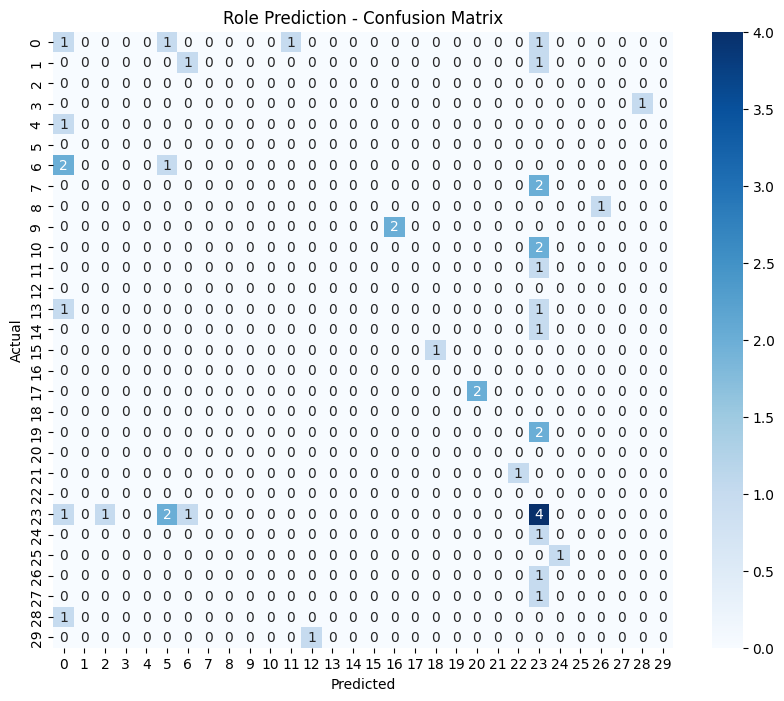

In [ ]:
# Confusion Matrix
role_conf_matrix = confusion_matrix(np.argmax(Y_role_test, axis=1), Y_role_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(role_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Role Prediction - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Classification Report
print("\nClassification Report for Role Prediction:")
print(classification_report(np.argmax(Y_role_test, axis=1), Y_role_pred))


Classification Report for Role Prediction:
              precision    recall  f1-score   support

           0       0.14      0.25      0.18         4
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
# Company Prediction Evaluation
Y_company_pred = company_model.predict(X_company_test)
Y_company_prob = company_model.predict_proba(X_company_test)
company_accuracy = accuracy_score(np.argmax(Y_company_test, axis=1), Y_company_pred)
print(f"\nCompany Prediction Accuracy: {company_accuracy:.4f}")


Company Prediction Accuracy: 0.0465


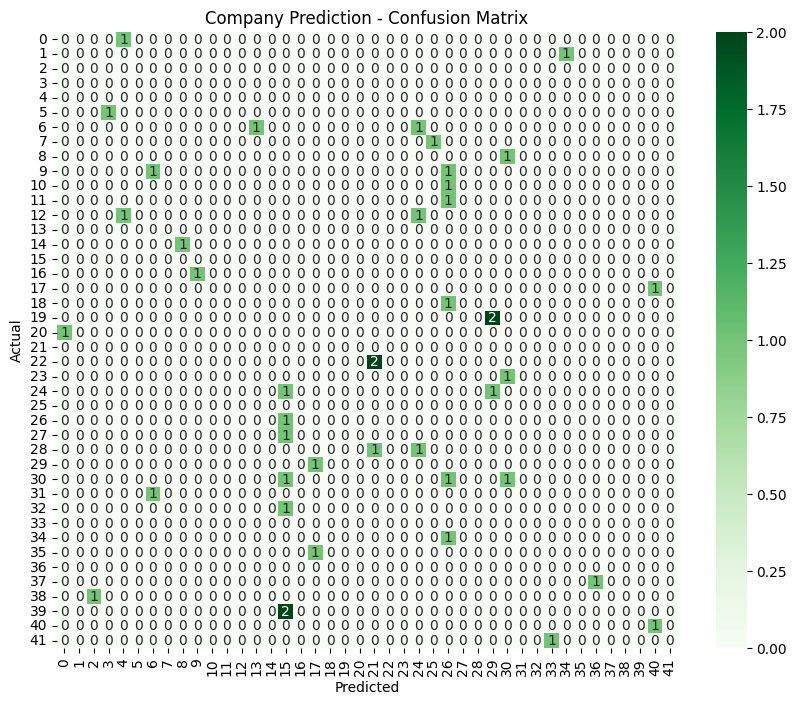

In [ ]:
# Confusion Matrix
company_conf_matrix = confusion_matrix(np.argmax(Y_company_test, axis=1), Y_company_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(company_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Company Prediction - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Classification Report
print("\nClassification Report for Company Prediction:")
print(classification_report(np.argmax(Y_company_test, axis=1), Y_company_pred))


Classification Report for Company Prediction:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          22       0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
# Step 8: Learning Curve

def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy')

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker='o')
    plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="green", marker='o')

    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.grid()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


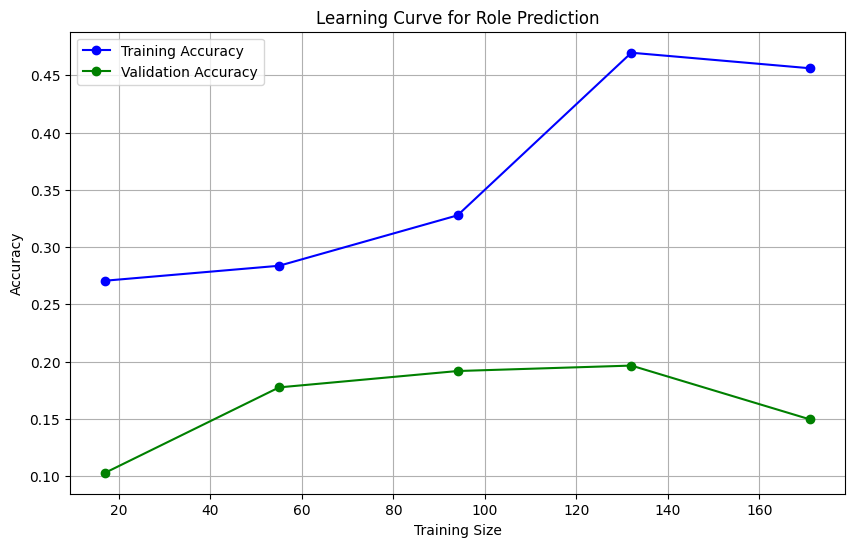

In [ ]:
# Plot Learning Curve for Role Prediction
plot_learning_curve(role_model, X_role_scaled, np.argmax(Y_role_encoded, axis=1), title="Learning Curve for Role Prediction")

In [ ]:
# Step 9: Gain Chart

def plot_gain_chart(y_true, y_prob, title="Gain Chart"):
    plt.figure(figsize=(8, 6))

    # Sort probabilities and true labels by predicted probabilities
    sorted_indices = np.argsort(y_prob)[::-1]
    y_true_sorted = y_true[sorted_indices]
    y_prob_sorted = y_prob[sorted_indices]

    # Compute cumulative gain
    cum_gain = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)
    ideal_gain = np.linspace(0, 1, len(cum_gain))

    plt.plot(cum_gain, label="Model Gain", color="blue")
    plt.plot(ideal_gain, label="Ideal Gain", linestyle='--', color="red")

    plt.title(title)
    plt.xlabel("Samples Sorted by Predicted Probabilities")
    plt.ylabel("Cumulative Gain")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

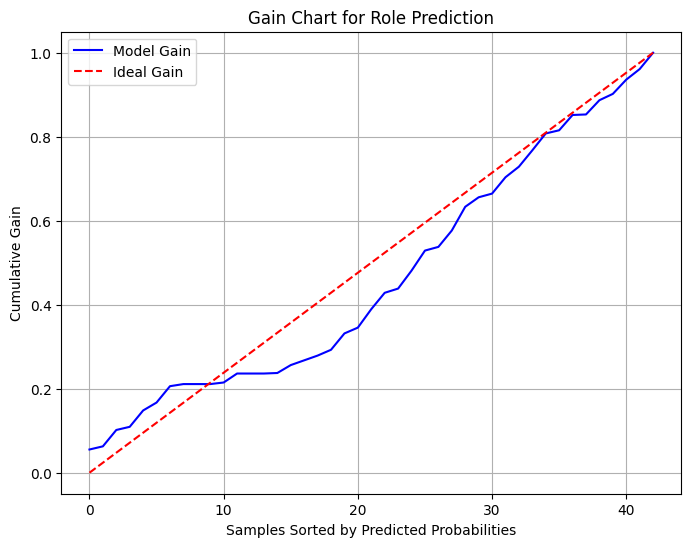

In [ ]:
# Plot Gain Chart for Role Prediction
plot_gain_chart(np.argmax(Y_role_test, axis=1), Y_role_prob[:, 0], title="Gain Chart for Role Prediction")

In [ ]:
def preprocess_input(df, name, scaler, columns):
    # Extract the data for the given name
    data = df[df['Name'] == name]
    if data.empty:
        raise ValueError(f"No data found for the name: {name}")
    X_data = data.drop(['Name', 'Role', 'Company'], axis=1)
    X_data = X_data[columns]  # Ensure columns are in the same order
    X_scaled = scaler.transform(X_data)
    return X_scaled

In [ ]:
def get_top_n_predictions(probs, target_names, top_n=5):
    top_indices = np.argsort(probs)[::-1][:top_n]
    top_probs = probs[top_indices]
    top_classes = target_names[top_indices]
    return list(zip(top_classes, top_probs))

In [ ]:
def predict_top_n_roles_and_companies(df, name, role_model, company_model, ohe_role, ohe_company, scaler_role, scaler_company, top_n=5):
    # Preprocess input for role prediction
    X_role_input = preprocess_input(df, name, scaler_role, X_role.columns)
    role_probs = role_model.predict_proba(X_role_input)[0]
    role_target_names = ohe_role.categories_[0]
    top_roles = get_top_n_predictions(role_probs, role_target_names, top_n=top_n)

    # Preprocess input for company prediction
    X_company_input = preprocess_input(df, name, scaler_company, X_company.columns)
    company_probs = company_model.predict_proba(X_company_input)[0]
    company_target_names = ohe_company.categories_[0]
    top_companies = get_top_n_predictions(company_probs, company_target_names, top_n=top_n)

    return top_roles, top_companies

In [ ]:
# Example usage:
name = "Basuri Bhujade"  # Replace with an actual name from your dataset
try:
    top_roles, top_companies = predict_top_n_roles_and_companies(df, name, role_model, company_model, ohe_role, ohe_company, scaler_role, scaler_company, top_n=5)

    print(f"\nTop 5 Predicted Roles for {name}:")
    for role, prob in top_roles:
        print(f"Role: {role}, Probability: {prob:.4f}")

    print(f"\nTop 5 Predicted Companies for {name}:")
    for company, prob in top_companies:
        print(f"Company: {company}, Probability: {prob:.4f}")
except ValueError as e:
    print(e)


Top 5 Predicted Roles for Basuri Bhujade:
Role: Analyst, Probability: 0.4000
Role: Associate SDE , Probability: 0.4000
Role: Assistant Product Manager, Probability: 0.2000
Role: Analyst , Probability: 0.0000
Role: Backend Developer , Probability: 0.0000

Top 5 Predicted Companies for Basuri Bhujade:
Company: PhonePe, Probability: 0.4000
Company: Transunioun, Probability: 0.2000
Company: Think360.ai, Probability: 0.2000
Company: JPMC, Probability: 0.2000
Company: Cimpress, Probability: 0.0000


In [ ]:
def predict_combined(name, top_n):
    top_roles, top_companies = predict_top_n_roles_and_companies(df, name, role_model, company_model, ohe_role, ohe_company, scaler_role, scaler_company, top_n=5)

    # Multiply Role and Company Probabilities
    combined_predictions = []
    for role, role_prob in top_roles:
        for company, company_prob in top_companies:
            combined_prob = role_prob * company_prob  # Multiply probabilities
            combined_predictions.append((role, company, combined_prob))

    # Sort combined predictions by probability in descending order
    combined_predictions.sort(key=lambda x: x[2], reverse=True)

    return combined_predictions[:top_n]

In [ ]:
# Example usage:
name = "Basuri Bhujade"  # Replace with an actual name from your dataset
try:
    top_predictions = predict_combined(name, top_n=5)

    print(f"\nTop 5 Predicted Roles and Companies with Multiplied Probabilities for {name}:")
    idx = 1
    for role, company, prob in top_predictions:
        print(f"{idx}) {role}, {company}, Probability: {prob:.4f}")
        idx += 1

except ValueError as e:
    print(e)


Top 5 Predicted Roles and Companies with Multiplied Probabilities for Basuri Bhujade:
1) Analyst, PhonePe, Probability: 0.1600
2) Associate SDE , PhonePe, Probability: 0.1600
3) Analyst, Transunioun, Probability: 0.0800
4) Analyst, Think360.ai, Probability: 0.0800
5) Analyst, JPMC, Probability: 0.0800


In [ ]:
# Step 10: Save Models and Encoders

joblib.dump(role_model, 'role_knn_model.pkl')
joblib.dump(company_model, 'company_knn_model.pkl')
joblib.dump(ohe_role, 'ohe_role.pkl')
joblib.dump(ohe_company, 'ohe_company.pkl')
joblib.dump(scaler_role, 'scaler_role.pkl')
joblib.dump(scaler_company, 'scaler_company.pkl')


['scaler_company.pkl']